# House Price Prediction

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Train.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes !="O"]
print(len(numerical_feature)) 
numerical_feature

3


['bath', 'balcony', 'price']

In [4]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) <= 25]
print(len(discrete_feature))
discrete_feature

2


['bath', 'balcony']

In [5]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(len(continuous_feature))
continuous_feature

1


['price']

In [6]:
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print(len(categorical_feature))
categorical_feature

6


['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Data Cleaning

#### Replacing Null Values with Mode

In [9]:
# replacing null values with most frequent values
from sklearn.impute import SimpleImputer
SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for values in data.columns:
    data[[values]] = SI.fit_transform(data[[values]])

In [10]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

#### Cleaning Unwanted Data

In [11]:
data.sort_values(['size'], ascending=False)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3815,Plot Area,Ready To Move,R.T. Nagar,9 Bedroom,GrrvaGr,1200,10.0,2.0,180.00
2929,Plot Area,Ready To Move,Sunkadakatte,9 Bedroom,GrrvaGr,1500,6.0,1.0,80.00
2815,Plot Area,Ready To Move,Vidyaranyapura,9 Bedroom,GrrvaGr,1200,9.0,2.0,100.00
2826,Built-up Area,Ready To Move,Kadugodi,9 Bedroom,GrrvaGr,6200,9.0,0.0,200.00
1078,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,Srvasks,3300,14.0,2.0,500.00
...,...,...,...,...,...,...,...,...,...
7901,Super built-up Area,18-Aug,Ananth Nagar,1 BHK,GrrvaGr,500,1.0,1.0,14.00
12637,Built-up Area,Ready To Move,Electronic City Phase II,1 BHK,GrrvaGr,575,1.0,1.0,16.75
1471,Built-up Area,18-Mar,Kengeri,1 BHK,GrrvaGr,340,1.0,1.0,10.00
3941,Super built-up Area,17-Sep,Sonnenahalli,1 BHK,Skacak,605,1.0,1.0,40.00


In [12]:
data['size'].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
43 Bedroom       1
16 BHK           1
14 BHK           1
13 BHK           1
19 BHK           1
12 Bedroom       1
27 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [13]:
# replacing BMK to Bedroom
data['size'] = data['size'].replace('1 BHK', '1 Bedroom')
data['size'] = data['size'].replace('2 BHK', '2 Bedroom')
data['size'] = data['size'].replace('3 BHK', '3 Bedroom')
data['size'] = data['size'].replace('4 BHK', '4 Bedroom')
data['size'] = data['size'].replace('5 BHK', '5 Bedroom')
data['size'] = data['size'].replace('6 BHK', '6 Bedroom')
data['size'] = data['size'].replace('7 BHK', '7 Bedroom')
data['size'] = data['size'].replace('8 BHK', '8 Bedroom')
data['size'] = data['size'].replace('9 BHK', '9 Bedroom')
data['size'] = data['size'].replace('10 BHK', '10 Bedroom')
data['size'] = data['size'].replace('11 BHK', '11 Bedroom')
data['size'] = data['size'].replace('13 BHK', '13 Bedroom')
data['size'] = data['size'].replace('16 BHK', '16 Bedroom')
data['size'] = data['size'].replace('27 BHK', '27 Bedroom')
data['size'] = data['size'].replace('19 BHK', '19 Bedroom')
data['size'] = data['size'].replace('14 BHK', '14 Bedroom')

# Explotary Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Plotting numerical features

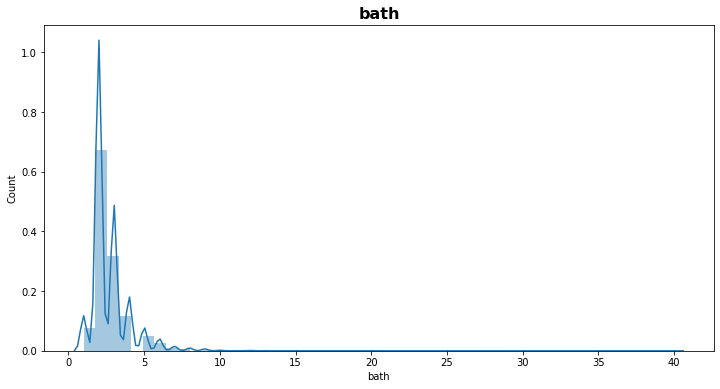

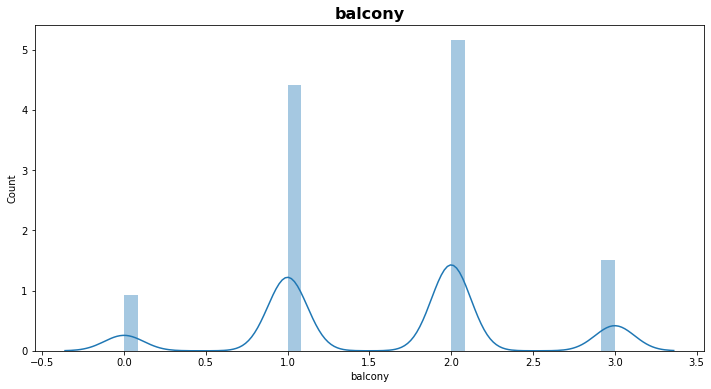

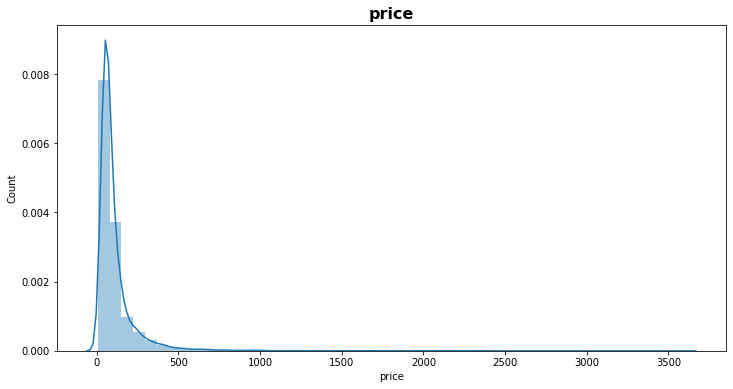

In [15]:
for feature in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.distplot(data[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature, fontdict={'fontsize':16, 'fontweight':'bold'})
plt.show()

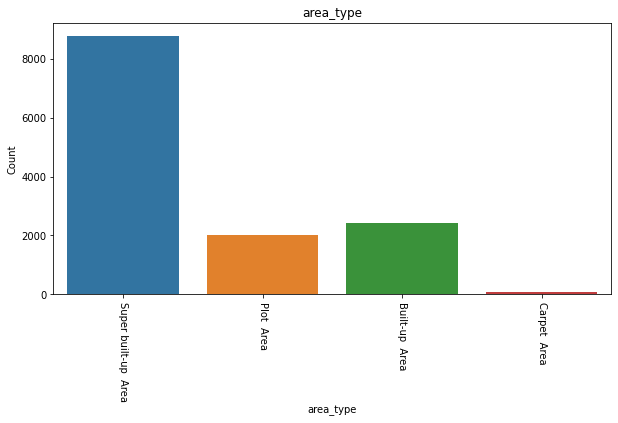

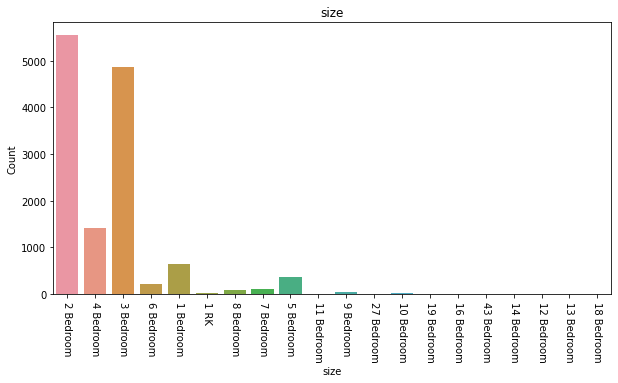

In [16]:
categorical = ['area_type', 'size']
for features in categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(data[features])
    plt.xlabel(features)
    plt.xticks(rotation=270)
    plt.ylabel('Count')
    plt.title(features)
plt.show()

#### Encoding categorical features

In [17]:
# converting categorical feature into numerical feature
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for values in categorical_feature:
    data[[values]]= LE.fit_transform(data[[values]])

In [18]:
data.dtypes

area_type         int32
availability      int32
location          int32
size              int32
society           int32
total_sqft        int32
bath            float64
balcony         float64
price           float64
dtype: object

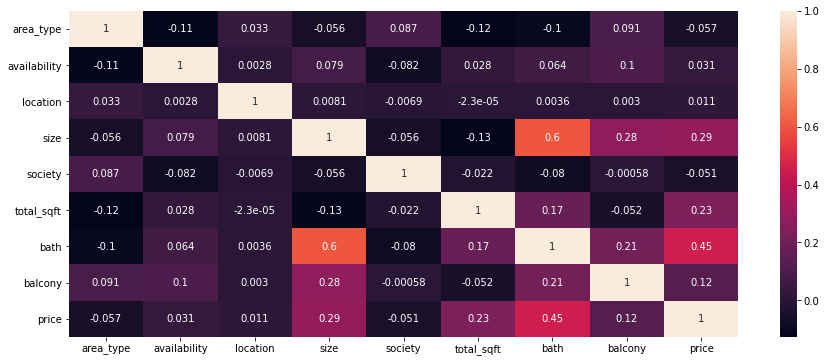

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

#### X and Y values

In [20]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:,-1].values

#### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)

In [40]:
# reshape y
y = y.reshape(-1,1)
y = SS.fit_transform(y)

# Model Training

In [41]:
X_train, y_train = X, y

In [42]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(X_train, y_train)

In [43]:
model

LinearRegression()

#### Importing our Test dataset

In [44]:
df = pd.read_csv('test.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [45]:
df = df.drop(['price'], axis=1)

In [46]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              2
society         626
total_sqft        0
bath              7
balcony          69
dtype: int64

#### Filling Null Values

In [47]:
# replacing null  values with most frequent values
for values in df.columns:
    df[[values]] = SI.fit_transform(df[[values]])

In [48]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
dtype: int64

#### Encoding Categorical values

In [49]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,Bhmesy,2400,9.0,2.0
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0


In [50]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for values in df.columns:
    df[values] = LE.fit_transform(df[values])

In [51]:
# assigning all values to X_test
# X_test = df

In [52]:
pred = model.predict(df)

In [75]:
pred = np.round(pred)

In [76]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3.0,50,95,5,404,121,1,2,17.357526
1,2.0,50,30,20,57,432,8,2,81.019546
2,2.0,12,185,10,441,300,4,2,51.534722
3,3.0,50,269,7,589,176,2,1,26.728586
4,3.0,50,274,5,26,82,1,1,17.226465


In [77]:
df['price'] = pred

In [78]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3.0,50,95,5,404,121,1,2,17.0
1,2.0,50,30,20,57,432,8,2,81.0
2,2.0,12,185,10,441,300,4,2,52.0
3,3.0,50,269,7,589,176,2,1,27.0
4,3.0,50,274,5,26,82,1,1,17.0


In [79]:
dataframe = df.to_csv('Prediction_Price.csv', index=False)